# Build a model using publicly available data for key *national* demand & supply factors that could influence US home prices. Use that to explain how these factors impacted home prices over the last 20 years.

#### You can use the S&P Case-Schiller Home Price Index as a proxy for home prices:
 fred.stlouisfed.org/series/CSUSHPISA.

#### Definitions

##### A national factor is one that impacts home prices nationally.

##### For example: The US unemployment rate is a national factor, Boston's unemployment rate is NOT a national factor , Avg. no of bedrooms in California is not a national factor

##### A demand factor is one that primarily impacts demand for homes from consumers, (Ex. Unemployment rate)

##### A supply factor is one that primarily impacts the supply of homes (ie. total homes available for sale) (Ex. Availability of land)

In [ ]:
import pandas as pd

In [ ]:
price= pd.read_csv('CSUSHPISA.csv')

In [ ]:
price

,DATE,CSUSHPISA
0,2000-01-01,100.551
1,2000-02-01,101.339
2,2000-03-01,102.126
3,2000-04-01,102.922
4,2000-05-01,103.677
...,...,...
277,2023-02-01,296.958
278,2023-03-01,298.210
279,2023-04-01,300.214
280,2023-05-01,302.657


In [ ]:
unemp_rate=pd.read_csv('U2RATE.csv')

In [ ]:
unemp_rate

,DATE,U2RATE
0,1967-01-01,1.6
1,1967-02-01,1.6
2,1967-03-01,1.5
3,1967-04-01,1.6
4,1967-05-01,1.6
...,...,...
675,2023-04-01,1.6
676,2023-05-01,1.8
677,2023-06-01,1.7
678,2023-07-01,1.6


In [ ]:
#New Houses for Sale by Stage of Construction, Not Started
constr_not_startd= pd.read_csv('NHFSEPNTS.csv')  # thousands of units

In [ ]:
constr_not_startd

,DATE,NHFSEPNTS
0,1999-01-01,38.0
1,1999-02-01,38.0
2,1999-03-01,36.0
3,1999-04-01,41.0
4,1999-05-01,39.0
...,...,...
290,2023-03-01,90.0
291,2023-04-01,93.0
292,2023-05-01,94.0
293,2023-06-01,97.0


In [ ]:
#New Houses for Sale by Stage of Construction, Under Construction
undr_constrtn = pd.read_csv('NHFSEPUCS.csv')    # thousands of units

In [ ]:
undr_constrtn

,DATE,NHFSEPUCS
0,1999-01-01,178.0
1,1999-02-01,180.0
2,1999-03-01,185.0
3,1999-04-01,180.0
4,1999-05-01,184.0
...,...,...
290,2023-03-01,273.0
291,2023-04-01,267.0
292,2023-05-01,266.0
293,2023-06-01,262.0


In [ ]:
# New Houses for Sale by Stage of Construction, Completed
cnstr_cmplt= pd.read_csv('NHFSEPCS.csv') # thousands of units

In [ ]:
cnstr_cmplt

,DATE,NHFSEPCS
0,1999-01-01,68.0
1,1999-02-01,67.0
2,1999-03-01,68.0
3,1999-04-01,69.0
4,1999-05-01,72.0
...,...,...
290,2023-03-01,70.0
291,2023-04-01,70.0
292,2023-05-01,66.0
293,2023-06-01,69.0


In [ ]:
df= pd.merge(cnstr_cmplt,undr_constrtn,on='DATE',how='inner')

In [ ]:
df1=pd.merge(constr_not_startd,unemp_rate,on='DATE',how='inner')

In [ ]:
df2=pd.merge(df,df1,on='DATE',how='inner')

In [ ]:
df2

,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,U2RATE
0,1999-01-01,68.0,178.0,38.0,2.0
1,1999-02-01,67.0,180.0,38.0,2.0
2,1999-03-01,68.0,185.0,36.0,1.9
3,1999-04-01,69.0,180.0,41.0,1.9
4,1999-05-01,72.0,184.0,39.0,1.9
...,...,...,...,...,...
290,2023-03-01,70.0,273.0,90.0,1.8
291,2023-04-01,70.0,267.0,93.0,1.6
292,2023-05-01,66.0,266.0,94.0,1.8
293,2023-06-01,69.0,262.0,97.0,1.7


In [ ]:
data=pd.merge(df2,price,on='DATE',how='inner')

In [ ]:
data

,DATE,NHFSEPCS,NHFSEPUCS,NHFSEPNTS,U2RATE,CSUSHPISA
0,2000-01-01,82.0,188.0,41.0,1.8,100.551
1,2000-02-01,79.0,180.0,40.0,1.9,101.339
2,2000-03-01,86.0,185.0,42.0,1.8,102.126
3,2000-04-01,80.0,185.0,40.0,1.6,102.922
4,2000-05-01,84.0,184.0,37.0,1.7,103.677
...,...,...,...,...,...,...
277,2023-02-01,69.0,278.0,90.0,1.7,296.958
278,2023-03-01,70.0,273.0,90.0,1.8,298.210
279,2023-04-01,70.0,267.0,93.0,1.6,300.214
280,2023-05-01,66.0,266.0,94.0,1.8,302.657


In [ ]:
data.rename(columns = {'NHFSEPCS':'Cnstr_Cmplt', 'NHFSEPUCS':'Undr_Cnstr','NHFSEPNTS':'Cnstr_Not_Strtd','U2RATE':'Unemp_Rate','CSUSHPISA':'Prc_Indx'}, inplace = True)

In [ ]:
data

,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,2000-01-01,82.0,188.0,41.0,1.8,100.551
1,2000-02-01,79.0,180.0,40.0,1.9,101.339
2,2000-03-01,86.0,185.0,42.0,1.8,102.126
3,2000-04-01,80.0,185.0,40.0,1.6,102.922
4,2000-05-01,84.0,184.0,37.0,1.7,103.677
...,...,...,...,...,...,...
277,2023-02-01,69.0,278.0,90.0,1.7,296.958
278,2023-03-01,70.0,273.0,90.0,1.8,298.210
279,2023-04-01,70.0,267.0,93.0,1.6,300.214
280,2023-05-01,66.0,266.0,94.0,1.8,302.657


In [ ]:
data.describe()

,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
count,282.000000,282.000000,282.000000,282.000000,282.000000
mean,82.336879,184.312057,53.095745,3.176241,174.611110
std,40.850957,69.331442,22.581006,1.597764,47.976841
min,31.000000,70.000000,22.000000,1.500000,100.551000
25%,54.250000,122.000000,36.000000,2.100000,142.343500
50%,76.000000,185.000000,48.000000,2.650000,166.998000
75%,88.750000,232.000000,68.000000,3.800000,192.369750
max,194.000000,338.000000,102.000000,13.200000,304.817000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 281
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DATE             282 non-null    object 
 1   Cnstr_Cmplt      282 non-null    float64
 2   Undr_Cnstr       282 non-null    float64
 3   Cnstr_Not_Strtd  282 non-null    float64
 4   Unemp_Rate       282 non-null    float64
 5   Prc_Indx         282 non-null    float64
dtypes: float64(5), object(1)
memory usage: 15.4+ KB


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

DATE               0
Cnstr_Cmplt        0
Undr_Cnstr         0
Cnstr_Not_Strtd    0
Unemp_Rate         0
Prc_Indx           0
dtype: int64

In [ ]:
data.nunique()

DATE               282
Cnstr_Cmplt        107
Undr_Cnstr         162
Cnstr_Not_Strtd     73
Unemp_Rate          55
Prc_Indx           282
dtype: int64

# EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data['year'] = pd.DatetimeIndex(data['DATE']).year

In [ ]:
data

,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx,year
0,2000-01-01,82.0,188.0,41.0,1.8,100.551,2000
1,2000-02-01,79.0,180.0,40.0,1.9,101.339,2000
2,2000-03-01,86.0,185.0,42.0,1.8,102.126,2000
3,2000-04-01,80.0,185.0,40.0,1.6,102.922,2000
4,2000-05-01,84.0,184.0,37.0,1.7,103.677,2000
...,...,...,...,...,...,...,...
277,2023-02-01,69.0,278.0,90.0,1.7,296.958,2023
278,2023-03-01,70.0,273.0,90.0,1.8,298.210,2023
279,2023-04-01,70.0,267.0,93.0,1.6,300.214,2023
280,2023-05-01,66.0,266.0,94.0,1.8,302.657,2023


In [ ]:
dd=data.groupby(by='year', as_index=False).mean()  # mean values of each factors on the yearly basis

<ipython-input-82-fcbb618eed7d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dd=data.groupby(by='year', as_index=False).mean()  # mean values of each factors on the yearly basis


In [ ]:
dd

,year,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,2000,84.250000,180.250000,39.500000,1.766667,104.768417
1,2001,77.583333,182.333333,41.833333,2.416667,113.179500
2,2002,82.500000,199.000000,46.000000,3.183333,122.278500
3,2003,80.833333,213.916667,53.666667,3.316667,133.731000
4,2004,89.916667,243.250000,62.166667,2.850000,150.440083
5,2005,106.750000,279.500000,81.416667,2.433333,171.736750
6,2006,144.083333,318.166667,91.083333,2.191667,183.447417
7,2007,185.416667,267.166667,78.500000,2.291667,179.918833
8,2008,179.083333,190.416667,56.000000,3.116667,164.057167
9,2009,128.000000,115.750000,35.083333,5.958333,148.544583


#### From 2001 to 2019  the mean number of houses where construction was completed were greater than the mean number of houses where construction was not started, but from 2020 the scenario became opposite

####  Mean number of Houses at under construction stage were always greater than the mean number of houses where construction is completed or not started  except in the year 2009 when the unemployment rate was incresing throughout the year

####  Unemployment rate was high for three consecutive years from 2009 to 2011 which impacted the price of houses available for sale (price became Low) and also the availablity of new houses for sale also went down.

#### In the year 2020 there was a sudden increase in the Unemployment Rate but there was no effect on the house prices, but the  number of houses whose construction were completed went down because of the Unemployment rate.


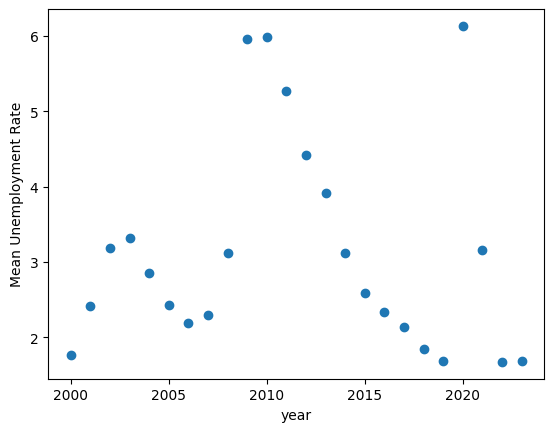

In [ ]:
plt.scatter(dd.year,dd.Unemp_Rate)
plt.xlabel('year')
plt.ylabel('Mean Unemployment Rate')
plt.show()

#### the first peak in unemployment rate came in the year 2009 and started to decrease slowly from 2011and became lewest in the year 2019 and again the second peak was seen in 2020.

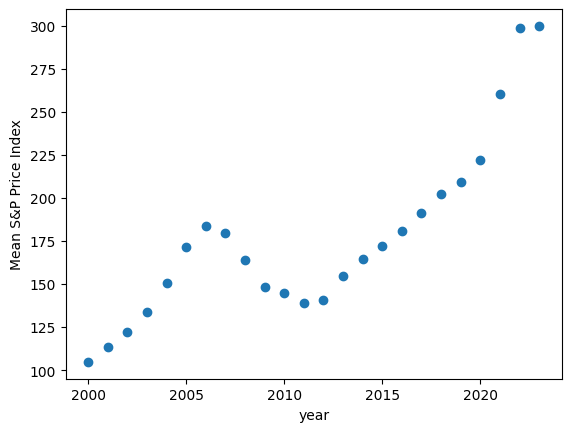

In [ ]:
plt.scatter(dd.year,dd.Prc_Indx)
plt.xlabel('year')
plt.ylabel('Mean S&P Price Index')
plt.show()

#### The price of house kept on increasing from year 2001 to 2006 and started gradually decreasing from 2007 to 2012 ( in the same year the unemployment rate started increasing ), after 2020 there was large difference in the price of house.    

In [ ]:
dMax=data.groupby(by='year', as_index=False).max()   # max values of each factors on the yearly basis
dMax

,year,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,2000,2000-12-01,90.0,188.0,42.0,1.9,109.140
1,2001,2001-12-01,82.0,191.0,45.0,3.1,116.456
2,2002,2002-12-01,86.0,204.0,52.0,3.3,127.623
3,2003,2003-12-01,86.0,232.0,61.0,3.5,140.179
4,2004,2004-12-01,97.0,257.0,70.0,3.1,159.330
5,2005,2005-12-01,110.0,306.0,95.0,2.7,180.910
6,2006,2006-12-01,166.0,338.0,100.0,2.3,184.364
7,2007,2007-12-01,194.0,285.0,85.0,2.5,184.598
8,2008,2008-12-01,191.0,227.0,69.0,4.3,173.132
9,2009,2009-12-01,161.0,139.0,41.0,6.5,151.506


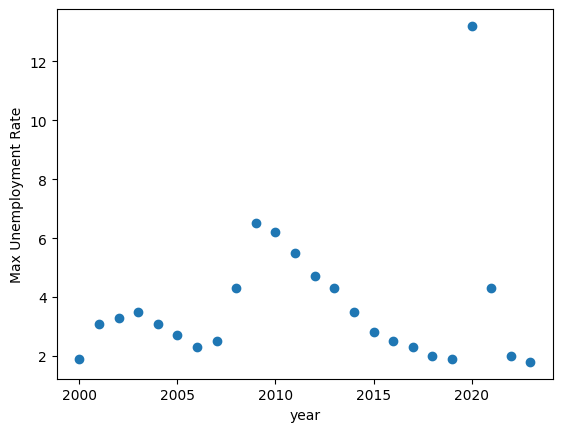

In [ ]:
plt.scatter(dMax.year,dMax.Unemp_Rate)
plt.xlabel('year')
plt.ylabel('Max Unemployment Rate')
plt.show()

#### Maximum Unemploylent Rate was seen in the year 2020

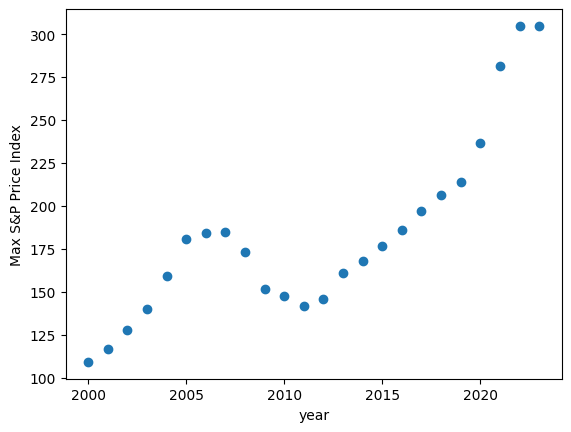

In [ ]:
plt.scatter(dMax.year,dMax.Prc_Indx)
plt.xlabel('year')
plt.ylabel('Max S&P Price Index')
plt.show()

In [ ]:
dMin=data.groupby(by='year', as_index=False).min()  # min values of each factors on the yearly basis
dMin

,year,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx
0,2000,2000-01-01,79.0,170.0,37.0,1.6,100.551
1,2001,2001-01-01,75.0,170.0,39.0,1.9,109.846
2,2002,2002-01-01,77.0,190.0,40.0,3.1,117.143
3,2003,2003-01-01,77.0,202.0,51.0,3.1,128.460
4,2004,2004-01-01,82.0,231.0,54.0,2.7,141.646
5,2005,2005-01-01,102.0,264.0,70.0,2.3,161.288
6,2006,2006-01-01,113.0,290.0,80.0,2.1,182.320
7,2007,2007-01-01,169.0,234.0,72.0,2.1,174.342
8,2008,2008-01-01,166.0,145.0,42.0,2.5,153.618
9,2009,2009-01-01,96.0,106.0,29.0,4.8,147.695


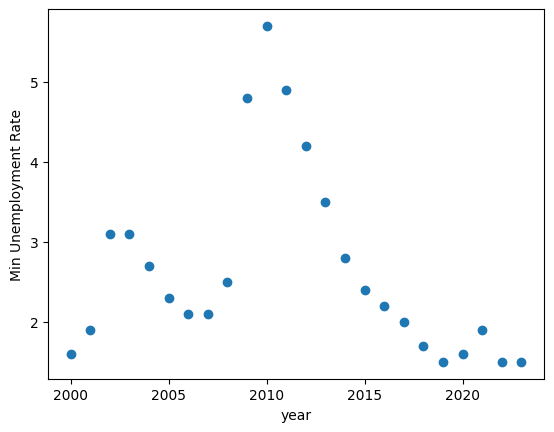

In [ ]:
plt.scatter(dMin.year,dMin.Unemp_Rate)
plt.xlabel('year')
plt.ylabel('Min Unemployment Rate')
plt.show()

#### Minimum Unemployment Rate was seen in the year 2019

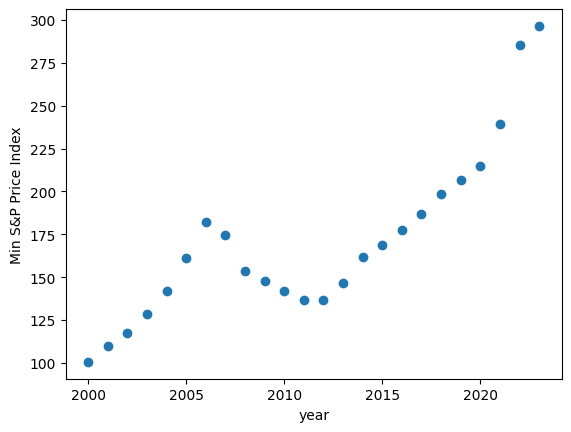

In [ ]:
plt.scatter(dMin.year,dMin.Prc_Indx)
plt.xlabel('year')
plt.ylabel('Min S&P Price Index')
plt.show()

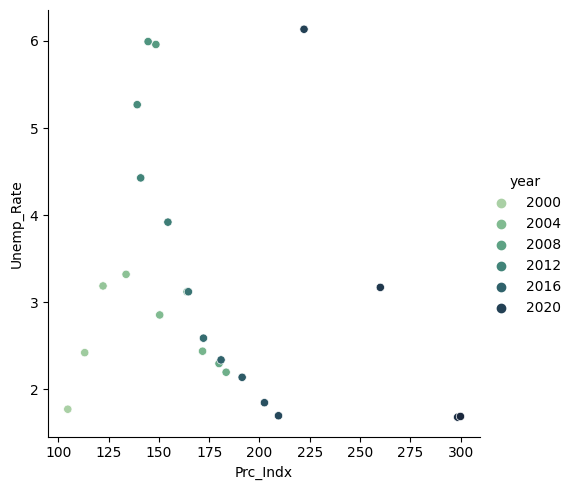

In [ ]:
sns.relplot(x="Prc_Indx", y="Unemp_Rate", hue="year", palette="ch:r=-.5,l=.75", data=dd);


In [ ]:
data[data['year']==2011]   # All the features value in the year 2011

,DATE,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx,year
132,2011-01-01,75.0,84.0,28.0,5.5,141.522,2011
133,2011-02-01,74.0,82.0,27.0,5.5,140.351,2011
134,2011-03-01,72.0,82.0,25.0,5.4,139.982,2011
135,2011-04-01,69.0,79.0,25.0,5.4,140.010,2011
136,2011-05-01,67.0,77.0,24.0,5.4,139.905,2011
137,2011-06-01,65.0,78.0,23.0,5.3,139.862,2011
138,2011-07-01,66.0,77.0,23.0,5.3,139.730,2011
139,2011-08-01,64.0,75.0,23.0,5.2,139.308,2011
140,2011-09-01,62.0,74.0,24.0,5.2,138.669,2011
141,2011-10-01,59.0,75.0,24.0,5.1,137.953,2011


In [ ]:
new=pd.read_csv('HNFSEPUSSA.csv')  # Total number of houses for sale

In [ ]:
new.head(12)

,DATE,HNFSEPUSSA
0,1963-01-01,235.0
1,1963-02-01,238.0
2,1963-03-01,242.0
3,1963-04-01,246.0
4,1963-05-01,248.0
5,1963-06-01,253.0
6,1963-07-01,254.0
7,1963-08-01,264.0
8,1963-09-01,257.0
9,1963-10-01,274.0


In [ ]:
new.describe()

,HNFSEPUSSA
count,727.000000
mean,313.906465
std,85.437649
min,142.000000
25%,253.500000
50%,312.000000
75%,362.000000
max,572.000000


In [ ]:
new['year']=  pd.DatetimeIndex(new['DATE']).year

In [ ]:
dd1=new.groupby(by='year',as_index=False).mean()

<ipython-input-98-891ef1802eec>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dd1=new.groupby(by='year',as_index=False).mean()


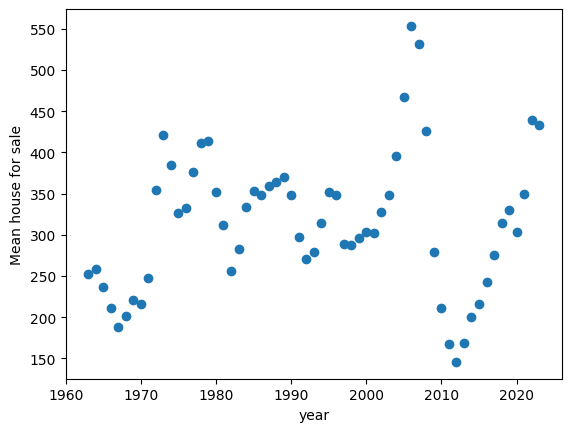

In [ ]:
plt.scatter(dd1.year,dd1.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Mean house for sale')
plt.show()

#### Maximum number of houses were available in 2006 and least in 2012


In [ ]:
dd1mx=new.groupby(by='year',as_index=False).max()
dd1mx

,year,DATE,HNFSEPUSSA
0,1963,1963-12-01,274.0
1,1964,1964-12-01,266.0
2,1965,1965-12-01,251.0
3,1966,1966-12-01,228.0
4,1967,1967-12-01,194.0
...,...,...,...
56,2019,2019-12-01,346.0
57,2020,2020-12-01,332.0
58,2021,2021-12-01,388.0
59,2022,2022-12-01,466.0


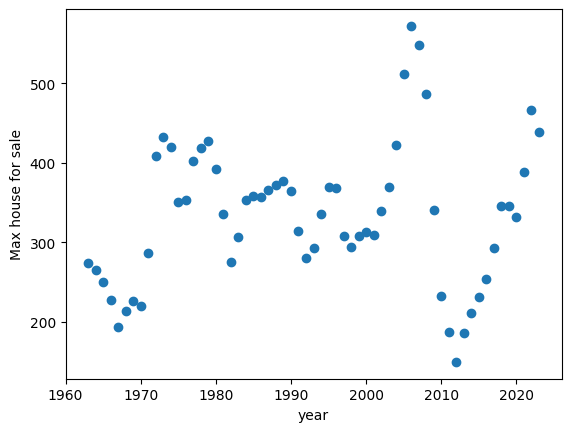

In [ ]:
plt.scatter(dd1mx.year,dd1mx.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Max house for sale')
plt.show()

In [ ]:
dd1mn=new.groupby(by='year',as_index=False).min()
dd1mn

,year,DATE,HNFSEPUSSA
0,1963,1963-01-01,235.0
1,1964,1964-01-01,249.0
2,1965,1965-01-01,226.0
3,1966,1966-01-01,193.0
4,1967,1967-01-01,181.0
...,...,...,...
56,2019,2019-01-01,319.0
57,2020,2020-01-01,281.0
58,2021,2021-01-01,303.0
59,2022,2022-01-01,394.0


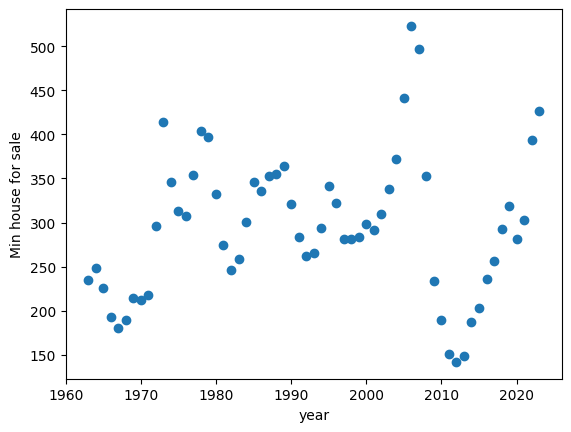

In [ ]:
plt.scatter(dd1mn.year,dd1mn.HNFSEPUSSA)
plt.xlabel('year')
plt.ylabel('Min house for sale')
plt.show()

In [ ]:
data.corr()

<ipython-input-104-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Cnstr_Cmplt,Undr_Cnstr,Cnstr_Not_Strtd,Unemp_Rate,Prc_Indx,year
Cnstr_Cmplt,1.000000,0.369381,0.256078,-0.042596,-0.217196,-0.488507
Undr_Cnstr,0.369381,1.000000,0.929230,-0.533156,0.472192,-0.066922
Cnstr_Not_Strtd,0.256078,0.929230,1.000000,-0.421637,0.692255,0.195151
Unemp_Rate,-0.042596,-0.533156,-0.421637,1.000000,-0.235641,-0.006090
Prc_Indx,-0.217196,0.472192,0.692255,-0.235641,1.000000,0.825447
year,-0.488507,-0.066922,0.195151,-0.006090,0.825447,1.000000


In [ ]:
df=pd.merge(new,data,on='DATE',how ='inner')

In [ ]:
df=df.drop(columns=['year_x','year_y','Cnstr_Cmplt','Undr_Cnstr','Cnstr_Not_Strtd'],axis=1)


In [ ]:
df.rename(columns={'HNFSEPUSSA':'ttl_homes_avlbl_for_sale'},inplace=True)

In [ ]:
df.drop(columns=['DATE'],axis=1,inplace=True)

In [ ]:
df

,ttl_homes_avlbl_for_sale,Unemp_Rate,Prc_Indx
0,311.0,1.8,100.551
1,299.0,1.9,101.339
2,313.0,1.8,102.126
3,305.0,1.6,102.922
4,305.0,1.7,103.677
...,...,...,...
277,437.0,1.7,296.958
278,433.0,1.8,298.210
279,430.0,1.6,300.214
280,426.0,1.8,302.657


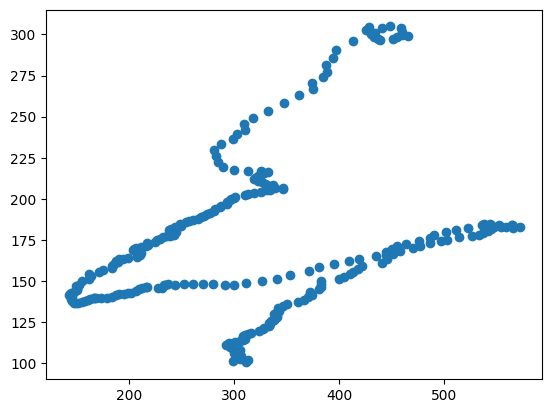

In [ ]:
plt.scatter(df.ttl_homes_avlbl_for_sale,df.Prc_Indx)

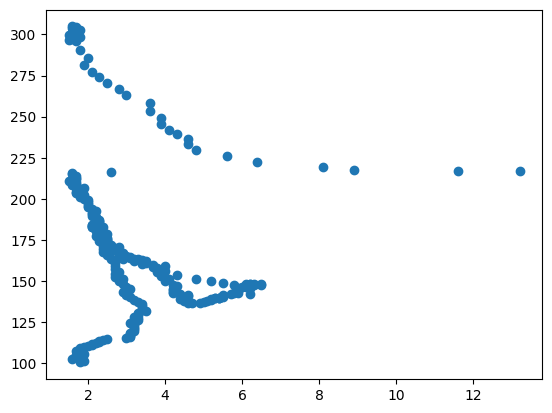

In [ ]:
plt.scatter(df.Unemp_Rate,df.Prc_Indx)

# Model Building

In [ ]:
X=df.drop(columns=['Prc_Indx'],axis=1)
Y=df['Prc_Indx']

In [ ]:
from sklearn.model_selection import train_test_split
Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(Xtr,Ytr)

LinearRegression()

In [ ]:
yprd=lr.predict(Xts)

In [ ]:
score=[]
for i in range(1000):
    Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(Xtr,Ytr)
    yprd=lr.predict(Xts)
    score.append(r2_score(Yts,yprd))

In [ ]:
import numpy as np
np.argmax(score)

445

In [ ]:
score[np.argmax(score)]

0.22701333652048583

#### Since the realtion between dependent and independent  variable is not linear  LR model is not giving good result

#### Therefor we are using Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 100,max_depth=9,random_state = 0)
regressor1.fit(Xtr, Ytr)

RandomForestRegressor(max_depth=9, random_state=0)

In [ ]:
Y_pred = regressor1.predict(Xts)

r2_score(Yts,Y_pred)

0.752445374544098

In [ ]:
scoree=[]
for i in range(1000):
    Xtr,Xts,Ytr,Yts = train_test_split(X,Y,test_size=0.2,random_state=i)
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
    regressor.fit(Xtr, Ytr)
    yprd=regressor.predict(Xts)
    scoree.append(r2_score(Yts,yprd))

In [ ]:
np.argmax(scoree)


911

In [ ]:
scoree[np.argmax(scoree)]

0.9316916603555754

### Regressor model gives better prediction   